Question: Which actors and directors contributed to more successful movies in the top 3 genres (Biography, Animation and Sci-Fi)? 

In [1]:
from module1_util_scripts.sqlreader import SQLReader
from module1_util_scripts.grapher import Grapher
import pandas as pd
import numpy as np

The function below queries the 'derived_ratings_df' table created in the question #1 notebook and builds off of that to include additional data on cast and crew members. More specifically, it filters the table to only the top 3 genres (Biography, Animation, Sci-Fi) and retreives data on actors and directors.

In [2]:
def generate_df():
    
    #use the ratings table created in question #1 as a starting point, since that table already has
    #movie weighted average rating info
    #join that table with the 'imdb_title_pricipals' and 'imdb_name_basics' datasets to get cast and crew info for 
    #each movie, and keep only the genres we're focusing on, and actors and directors
    query = """ 
            SELECT r.original_title, r.start_year, r.genres, r.total_votes, r.weighted_average_rating, r.sum_ratings,
                    p.category, n.primary_name
            FROM derived_ratings_df r
            LEFT JOIN (SELECT tconst, nconst, category
                        FROM imdb_title_principals) p
            USING (tconst)
            LEFT JOIN (SELECT nconst, primary_name
                        FROM imdb_name_basics) n
            USING (nconst)
            WHERE (p.category IN ('actor', 'director') 
                    AND r.genres IN ('Biography', 'Animation', 'Sci-Fi')
                    AND r.weighted_average_rating IS NOT NULL);
            """
    db = 'movies_db.sqlite'
    df = SQLReader.read(query, db)
    df.drop_duplicates(inplace=True)
    return df

The function below uses the dataframe generated in the function above and plots the top 10 actors and directors for each genre using horizontal bar graphs. 

In [3]:
def plot_top_10(df):
    
    #create bar graphs of the top 10 actors and directors for the 3 genres we are focusing on
    #for each actor and director, we are looking at the average ratings of all the ratings the movies they
    #acted/directed on received. 
    for genre in df['genres'].unique():
        for category in df['category'].unique():
            title = f'Top 10 {category}s for {genre} Movies'.title()
            print(f'Plotting {title}')
            plot_df = df.loc[(df['genres'] == genre) & (df['category'] == category)].copy()
            plot_df = plot_df.groupby(['primary_name'])[['total_votes', 'sum_ratings']].sum()
            plot_df['weighted_average_rating'] = plot_df['sum_ratings'] / plot_df['total_votes']
            plot_df = plot_df[plot_df['total_votes'] > np.quantile(plot_df['total_votes'].values, 0.9)]
            top_10_df = pd.DataFrame(plot_df['weighted_average_rating'].sort_values(ascending=False)[0:10])
            top_10_df = top_10_df.rename(columns={'weighted_average_rating': 'Average Rating'})
            Grapher.plot_multiple_bar_graph(
                'Average Rating',
                category.capitalize(), 
                title, 
                top_10_df, 
                ymin=0, 
                ymax=10,
                barvalues=True,
                h=True
            )

The code block below executes the functions above to display the top 10 actors and directors for each genre using bar graphs. One thing to note is that the code does not filter actors/directors to any particular market. So, on top of looking at the top actors and directors, it's important to look deeper and research into the background of the actual individual to find out specifics on what kinds of productions they have good experience in. 

Processing SQL Query with SQLReader
Connecting to movies_db.sqlite with SQLReader
Sucessfully fetched query results with SQLReader
Closed connection to movies_db.sqlite with SQLReader
Plotting Top 10 Directors For Biography Movies


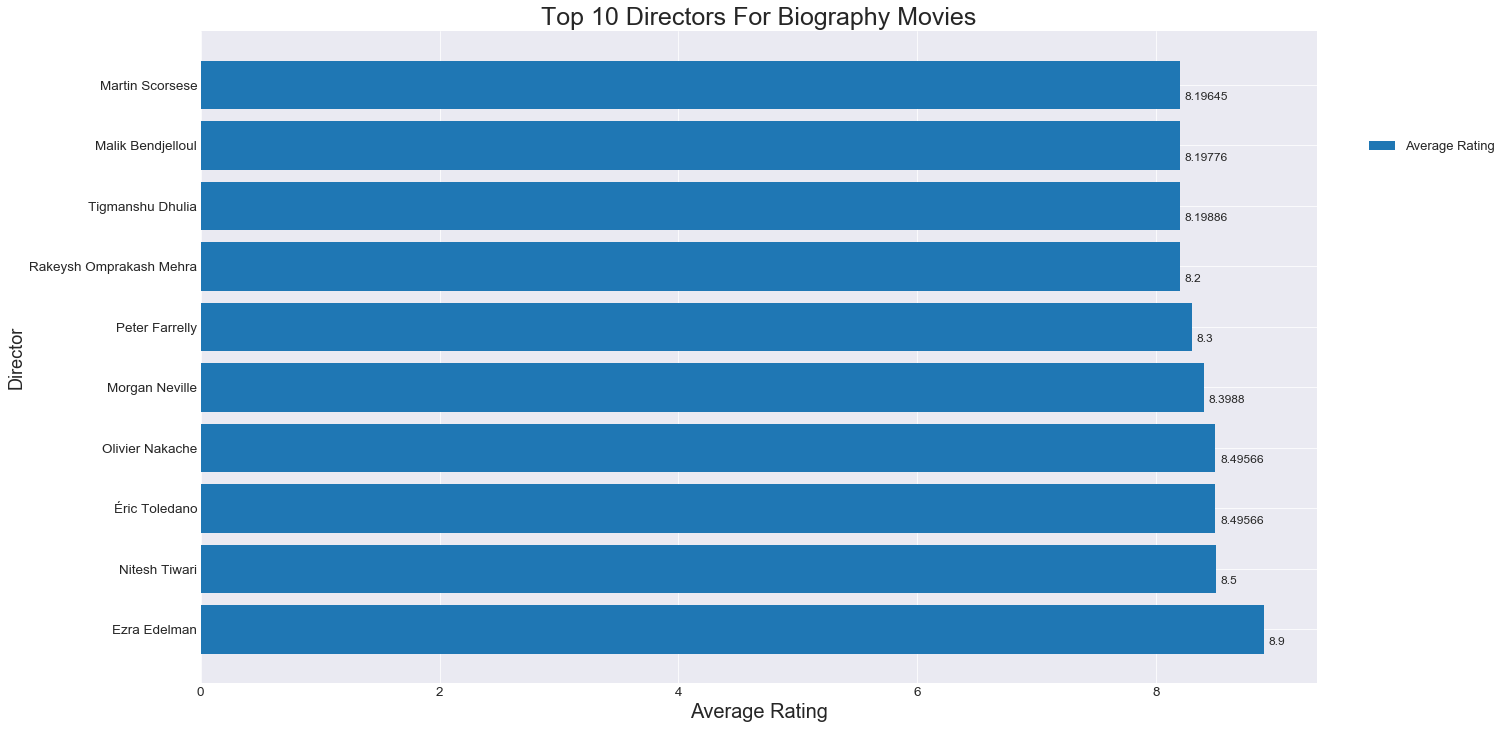

Plotting Top 10 Actors For Biography Movies


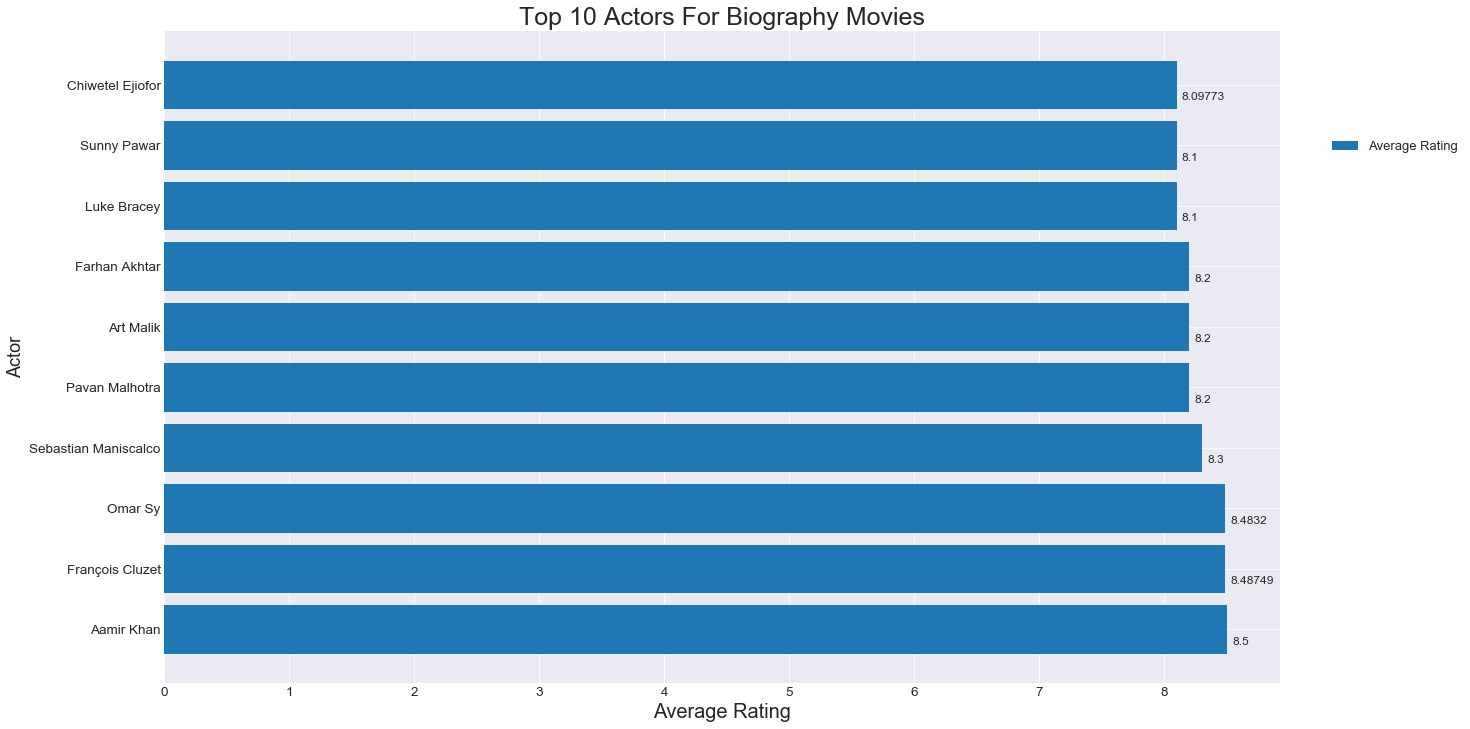

Plotting Top 10 Directors For Animation Movies


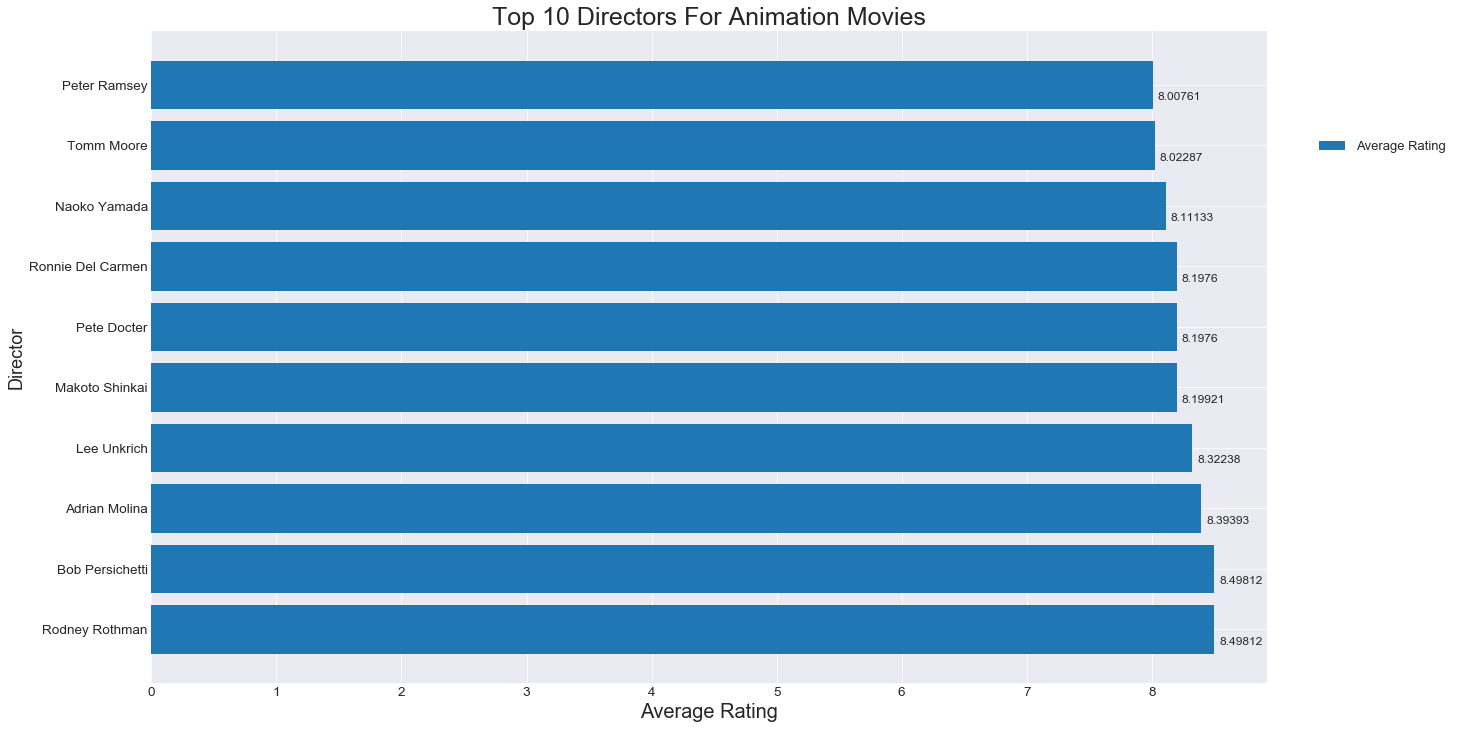

Plotting Top 10 Actors For Animation Movies


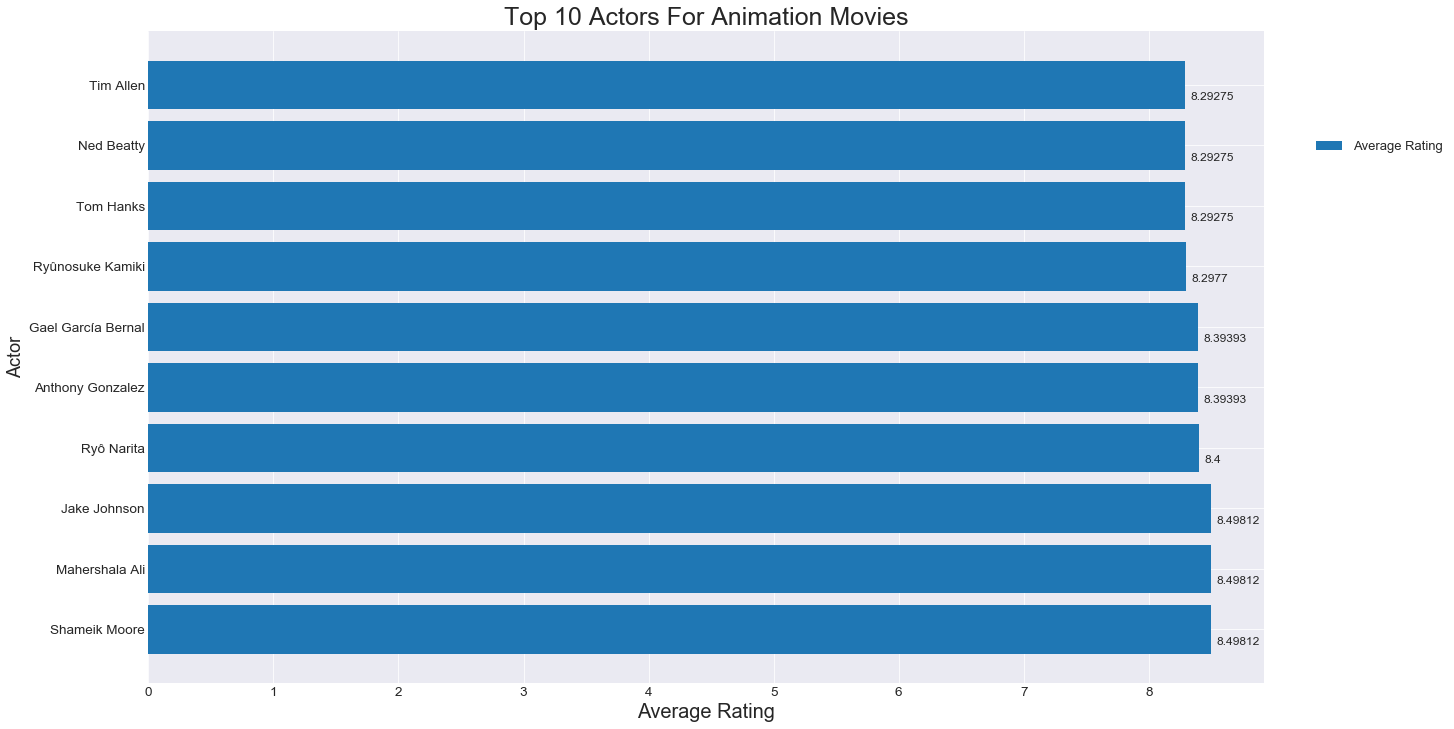

Plotting Top 10 Directors For Sci-Fi Movies


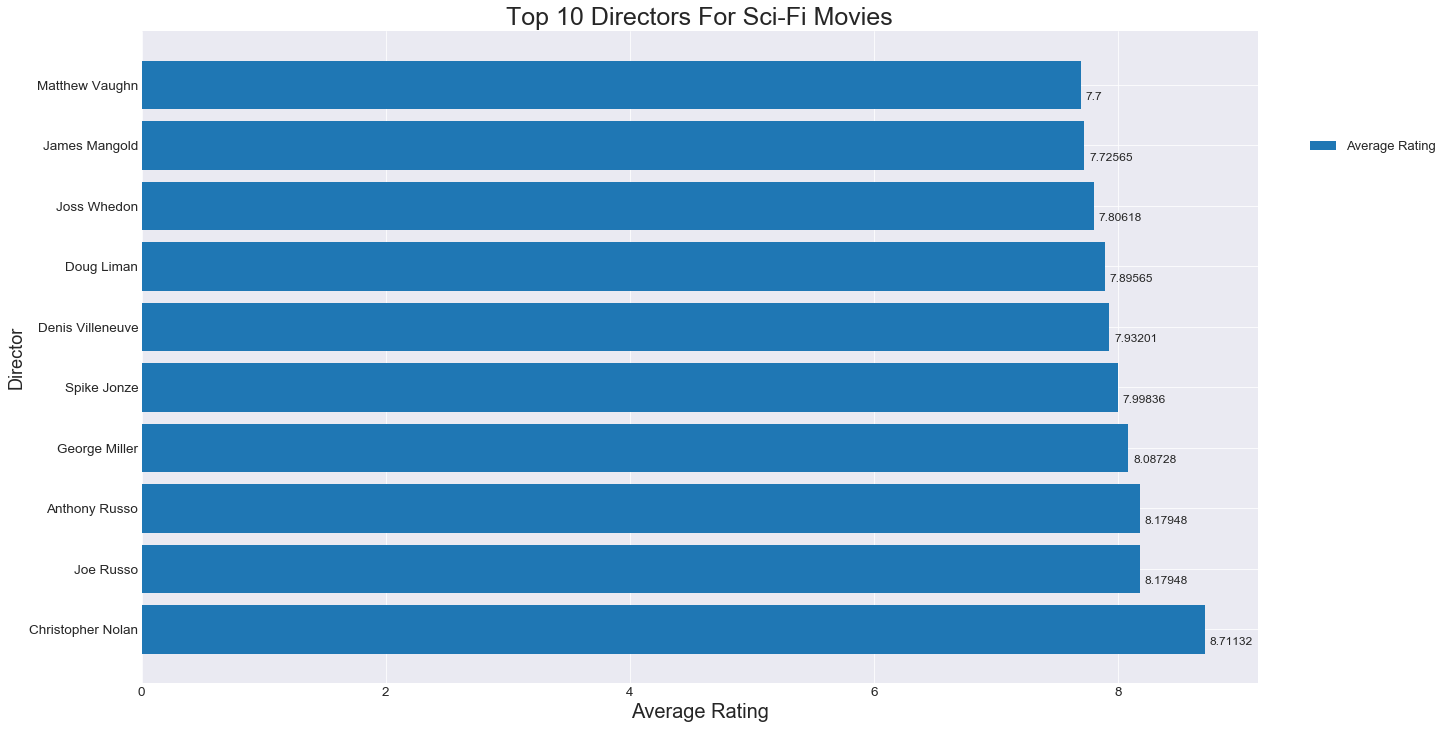

Plotting Top 10 Actors For Sci-Fi Movies


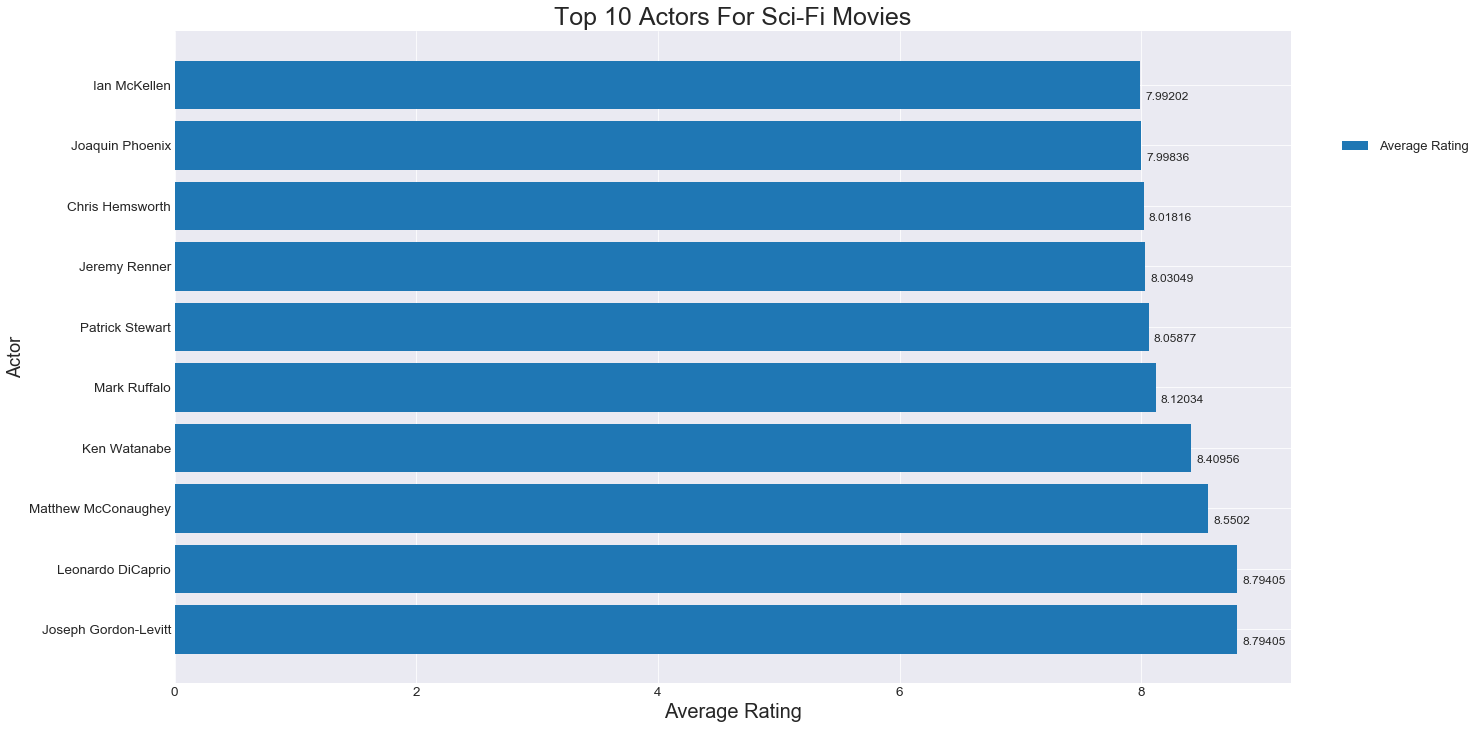

In [4]:
df = generate_df()
plot_top_10(df)